In [1]:
# Importing of libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [2]:
# Importing pyspark and initialising Spark session
from pyspark import SparkContext, SparkConf
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [2]:
# Import sys - checking for issues with data processing
#print(sys.getrecursionlimit())
#sys.setrecursionlimit(1500)

3000


In [3]:
#Checking environmental variables
print(os.environ['SPARK_HOME'])
print(os.environ['JAVA_HOME'])
print(os.environ['PATH'])

C:\Spark\
C:\Java\jdk1.8.0_291\
C:\Users\Jared\Anaconda3;C:\Users\Jared\Anaconda3\Library\mingw-w64\bin;C:\Users\Jared\Anaconda3\Library\usr\bin;C:\Users\Jared\Anaconda3\Library\bin;C:\Users\Jared\Anaconda3\Scripts;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\ProgramData\Oracle\Java\javapath;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files\Calibre2\;C:\Program Files\Git\cmd;C:\Python\Python33;C:\Users\Jared\AppData\Local\Programs\Python\Python36;C:\Users\Jared\AppData\Local\Programs\Python\Python36\Scripts;C:\Program Files\Docker\Docker\resources\bin;C:\ProgramData\DockerDesktop\version-bin;C:\Hadoop\bin;C:\Hadoop\sbin;%JAVA_HOME%\bin;%HADOOP_HOME%\bin;%SPARK_HOME%\bin;C:\Users\Jared\AppData\Local\Programs\Python\Python36\;C:\Users\Jared\AppData\Local\Microsoft\WindowsApps;C:\Users\Jared\AppData\Local\GitHubDesktop\bin;C:\Java\jdk1.8.0_291\\bin;C:\Spark\\bin;C:\Hadoop\\bin;C:

In [4]:
# Load data with RDD
rdd1 = sc.textFile('C:/Users/Jared/Dropbox/STUDY/Semester2/BDMDV/Coursework/SFPNA.csv')
# List of columns
rdd1.first()

'Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,ISO_3166_2,AvgTimeToPark,AvgTimeToParkRatio,TotalSearching,PercentSearching,AvgUniqueGeohashes,AvgTotalGeohashes,CirclingDistribution,HourlyDistribution,SearchingByHour,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,UpdateDate,Version'

In [5]:
# Filter function
rdd_head = rdd1.first()
rdd2 = rdd1.filter(lambda line:line!=rdd_head)
# List of attributes for the first feature
rdd2.first()

'dr5rsr8,"POLYGON((-73.992919921875 40.7345581054688, -73.9915466308594 40.7345581054688, -73.9915466308594 40.7359313964844, -73.992919921875 40.7359313964844, -73.992919921875 40.7345581054688))",40.735,-73.993,40.736,-73.992,POINT(-73.99243 40.73529),40.735,-73.992,New York,New York,New York,United States of America (the),US-NY,11.553,4.943,5,0.119,5.4,8.4,"{""dr5rsrc"":0.1475, ""dr5rsrb"":0.1392, ""dr5rspz"":0.1023, ""dr5rspr"":0.0974, ""dr5rspx"":0.0863, ""dr5rsr2"":0.0868, ""dr5rsr3"":0.1329, ""dr5rsr9"":0.0362, ""dr5rsr8"":0.1713}","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": null, ""05"": null, ""06"": null, ""07"": 0.2, ""08"": 0.2, ""09"": 0, ""10"": 0.2, ""11"": 0.2, ""12"": 0, ""13"": 0, ""14"": 0, ""15"": 0, ""16"": 0, ""17"": 0, ""18"": 0, ""19"": 0, ""20"": 0.2, ""21"": null, ""22"": 0, ""23"": 0}","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": null, ""05"": null, ""06"": null, ""07"": 1, ""08"": 0.3333, ""09"": 0, ""10"": 0.1429, 

In [6]:
# Map function
rdd2.map(lambda line:line.split(',')).take(1)

[['dr5rsr8',
  '"POLYGON((-73.992919921875 40.7345581054688',
  ' -73.9915466308594 40.7345581054688',
  ' -73.9915466308594 40.7359313964844',
  ' -73.992919921875 40.7359313964844',
  ' -73.992919921875 40.7345581054688))"',
  '40.735',
  '-73.993',
  '40.736',
  '-73.992',
  'POINT(-73.99243 40.73529)',
  '40.735',
  '-73.992',
  'New York',
  'New York',
  'New York',
  'United States of America (the)',
  'US-NY',
  '11.553',
  '4.943',
  '5',
  '0.119',
  '5.4',
  '8.4',
  '"{""dr5rsrc"":0.1475',
  ' ""dr5rsrb"":0.1392',
  ' ""dr5rspz"":0.1023',
  ' ""dr5rspr"":0.0974',
  ' ""dr5rspx"":0.0863',
  ' ""dr5rsr2"":0.0868',
  ' ""dr5rsr3"":0.1329',
  ' ""dr5rsr9"":0.0362',
  ' ""dr5rsr8"":0.1713}"',
  '"{""00"": null',
  ' ""01"": null',
  ' ""02"": null',
  ' ""03"": null',
  ' ""04"": null',
  ' ""05"": null',
  ' ""06"": null',
  ' ""07"": 0.2',
  ' ""08"": 0.2',
  ' ""09"": 0',
  ' ""10"": 0.2',
  ' ""11"": 0.2',
  ' ""12"": 0',
  ' ""13"": 0',
  ' ""14"": 0',
  ' ""15"": 0',
  ' "

In [7]:
# Load dataset into a dataframe
df = spark.read.option('header','true').option('inferSchema','true').csv('C:/Users/Jared/Dropbox/STUDY/Semester2/BDMDV/Coursework/SFPNA.csv')

In [8]:
# Checking column names
print(df.columns)

['Geohash', 'GeohashBounds', 'Latitude_SW', 'Longitude_SW', 'Latitude_NE', 'Longitude_NE', 'Location', 'Latitude', 'Longitude', 'City', 'County', 'State', 'Country', 'ISO_3166_2', 'AvgTimeToPark', 'AvgTimeToParkRatio', 'TotalSearching', 'PercentSearching', 'AvgUniqueGeohashes', 'AvgTotalGeohashes', 'CirclingDistribution', 'HourlyDistribution', 'SearchingByHour', 'PercentCar', 'PercentMPV', 'PercentLDT', 'PercentMDT', 'PercentHDT', 'PercentOther', 'UpdateDate', 'Version']


In [9]:
# Checking schemas of data
df.printSchema()

root
 |-- Geohash: string (nullable = true)
 |-- GeohashBounds: string (nullable = true)
 |-- Latitude_SW: double (nullable = true)
 |-- Longitude_SW: double (nullable = true)
 |-- Latitude_NE: double (nullable = true)
 |-- Longitude_NE: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- ISO_3166_2: string (nullable = true)
 |-- AvgTimeToPark: double (nullable = true)
 |-- AvgTimeToParkRatio: double (nullable = true)
 |-- TotalSearching: integer (nullable = true)
 |-- PercentSearching: double (nullable = true)
 |-- AvgUniqueGeohashes: double (nullable = true)
 |-- AvgTotalGeohashes: double (nullable = true)
 |-- CirclingDistribution: string (nullable = true)
 |-- HourlyDistribution: string (nullable = true)
 |-- SearchingByHour: string (nul

In [10]:
# Check number of records before removing duplicates
df.count()

4750

In [11]:
# Drop duplicates and check number of records
df = df.dropDuplicates()
df.count()

4750

In [12]:
# Selection of columns for further processing
df1 = df['Latitude', 'Longitude', 'AvgTimeToPark', 'AvgTimeToParkRatio',
         'TotalSearching', 'PercentSearching', 'AvgUniqueGeohashes',
         'AvgTotalGeohashes']
df1

DataFrame[Latitude: double, Longitude: double, AvgTimeToPark: double, AvgTimeToParkRatio: double, TotalSearching: int, PercentSearching: double, AvgUniqueGeohashes: double, AvgTotalGeohashes: double]

In [13]:
from sklearn import preprocessing
df1.columns

['Latitude',
 'Longitude',
 'AvgTimeToPark',
 'AvgTimeToParkRatio',
 'TotalSearching',
 'PercentSearching',
 'AvgUniqueGeohashes',
 'AvgTotalGeohashes']

In [ ]:
# Data standardisation
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfs = pd.DataFrame(x_scaled)

In [15]:
# Standardised dataset 
dfs = pd.read_csv('C:/Users/Jared/Dropbox/STUDY/Semester2/BDMDV/Coursework/SFPNAS.csv')

In [16]:
# Check correlation coefficient
kor = dfs.corr()
kor

,Latitude,Longitude,AvgTimeToPark,AvgTimeToParkRatio,TotalSearching,PercentSearching,AvgUniqueGeohashes,AvgTotalGeohashes
Latitude,1.000000,0.100334,0.004089,-0.045994,0.003470,-0.028222,0.005862,0.188208
Longitude,0.100334,1.000000,0.208261,-0.045272,-0.050146,-0.179265,0.066811,-0.272703
AvgTimeToPark,0.004089,0.208261,1.000000,0.172793,-0.066836,-0.431087,0.304327,0.004072
AvgTimeToParkRatio,-0.045994,-0.045272,0.172793,1.000000,-0.080569,0.038940,0.049524,0.072078
TotalSearching,0.003470,-0.050146,-0.066836,-0.080569,1.000000,0.153742,-0.037628,0.044979
PercentSearching,-0.028222,-0.179265,-0.431087,0.038940,0.153742,1.000000,-0.016033,0.214232
AvgUniqueGeohashes,0.005862,0.066811,0.304327,0.049524,-0.037628,-0.016033,1.000000,0.236714
AvgTotalGeohashes,0.188208,-0.272703,0.004072,0.072078,0.044979,0.214232,0.236714,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

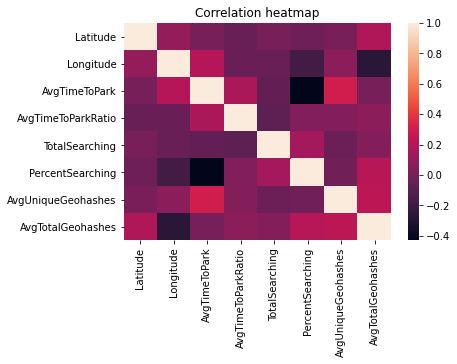

In [17]:
sns.heatmap(kor, 
        xticklabels=kor.columns,
        yticklabels=kor.columns).set_title('Correlation heatmap')

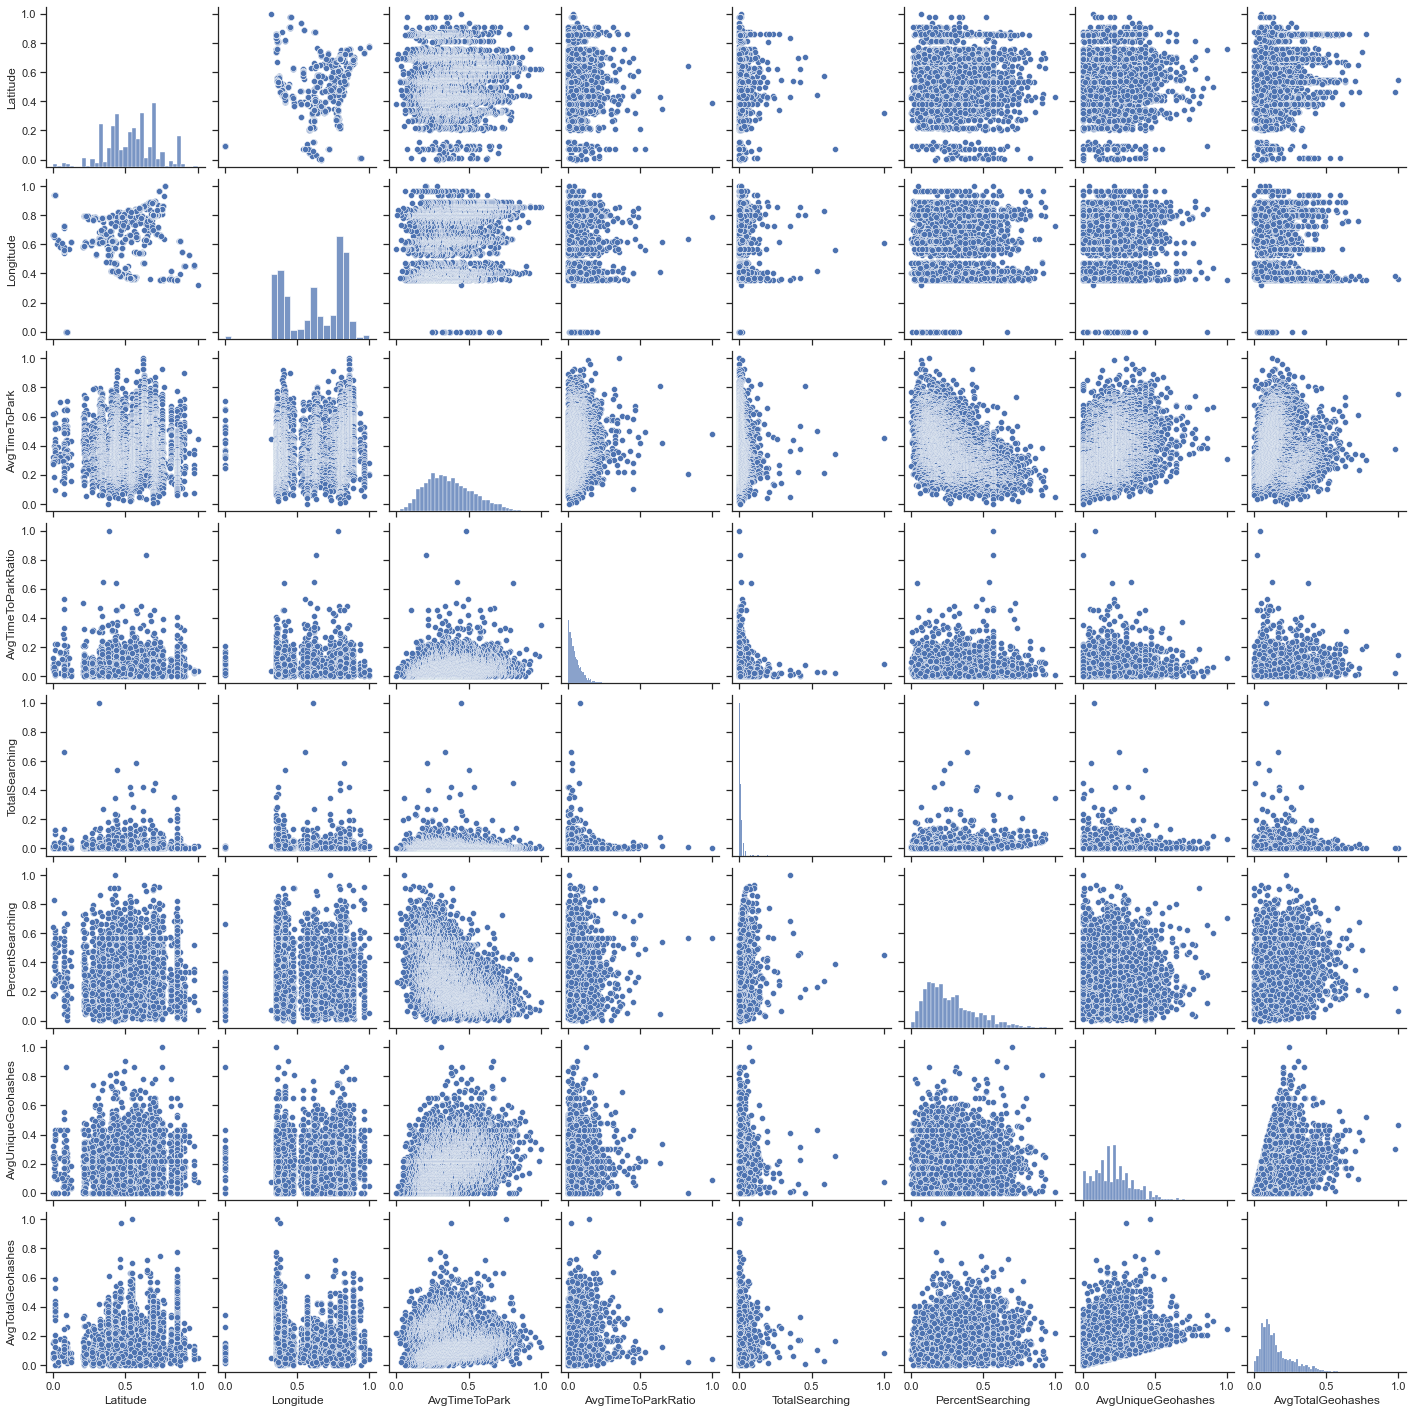

In [52]:
# Pair plot
sns.set(style="ticks")
sns.pairplot(dfs)
plt.show()

In [18]:
dfp = df.toPandas()
df2 = dfp.iloc[:,:]

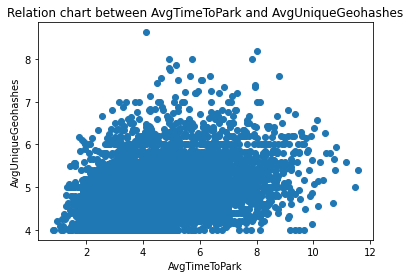

In [19]:
plt.scatter(df2['AvgTimeToPark'], df2['AvgUniqueGeohashes'])
plt.xlabel('AvgTimeToPark')
plt.ylabel('AvgUniqueGeohashes')
plt.title('Relation chart between AvgTimeToPark and AvgUniqueGeohashes')
plt.show()

In [20]:
from pyspark.ml.feature import VectorAssembler
data = df.select(df.AvgTimeToPark.alias('label'), df.AvgUniqueGeohashes)
train, test = data.randomSplit([0.67,0.33])
assembler = VectorAssembler().setInputCols(
    ['AvgUniqueGeohashes']).setOutputCol('features')
train1 = assembler.transform(train)
train2 = train1.select('features','label')

In [21]:
train2.show(truncate=False)

+--------+-----+
|features|label|
+--------+-----+
|[4.033] |2.476|
|[4.7]   |3.387|
|[5.714] |3.583|
|[6.167] |3.858|
|[4.833] |4.017|
|[4.0]   |4.033|
|[4.333] |4.111|
|[4.643] |4.441|
|[5.4]   |4.53 |
|[5.143] |5.002|
|[5.4]   |5.313|
|[4.375] |5.425|
|[4.2]   |6.043|
|[5.0]   |6.197|
|[4.625] |6.256|
|[4.4]   |6.45 |
|[5.5]   |7.192|
|[6.067] |1.947|
|[4.667] |2.722|
|[5.391] |2.996|
+--------+-----+
only showing top 20 rows



In [22]:
# Import LinearRegression class
from pyspark.ml.regression import LinearRegression
lr = LinearRegression()
model = lr.fit(train2)
test1 = assembler.transform(test)
test2 = test1.select('features', 'label')
test3 = model.transform(test2)

In [23]:
test3.show()

+--------+-----+------------------+
|features|label|        prediction|
+--------+-----+------------------+
| [4.154]|1.918| 4.140635238228235|
| [4.733]|3.923| 4.624989034308005|
|   [4.6]|5.367| 4.513729872168783|
|   [5.8]|  8.3| 5.517571936582813|
| [5.571]|1.571| 5.326005409290469|
| [4.625]|2.898| 4.534643248510742|
|   [4.6]|3.027| 4.513729872168783|
| [5.474]|4.128| 5.244861509083669|
|   [5.2]| 5.24| 5.015650904375798|
| [5.143]|6.281| 4.967968406316132|
|   [5.7]|7.268| 5.433918431214978|
|   [4.8]|2.497| 4.681036882904455|
| [6.111]|2.885| 5.777734338276783|
|   [4.2]|3.397|  4.17911585069744|
| [4.857]|3.769|4.7287193809641215|
|   [4.4]|5.973| 4.346422861433111|
|   [5.6]| 6.51| 5.350264925847141|
|   [5.5]|1.614| 5.266611420479306|
| [5.133]|2.403| 4.959603055779349|
|   [5.0]|2.687| 4.848343893640127|
+--------+-----+------------------+
only showing top 20 rows



In [24]:
# Model evaluation - R-squared
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator()
print(evaluator.evaluate(test3,{evaluator.metricName: "r2"}))

0.0909405816350326


In [25]:
# Model evaluation - mse, rmse and mae
print(evaluator.evaluate(test3,{evaluator.metricName: "mse"}))
print(evaluator.evaluate(test3,{evaluator.metricName: "rmse"}))
print(evaluator.evaluate(test3,{evaluator.metricName: "mae"}))

2.7993198954703225
1.6731168206285902
1.3468584560875196


In [26]:
# Model evaluation - coefficients and intercepts
print(model.coefficients)
print(model.intercept)

[0.8365350536783587]
0.6656686252483329


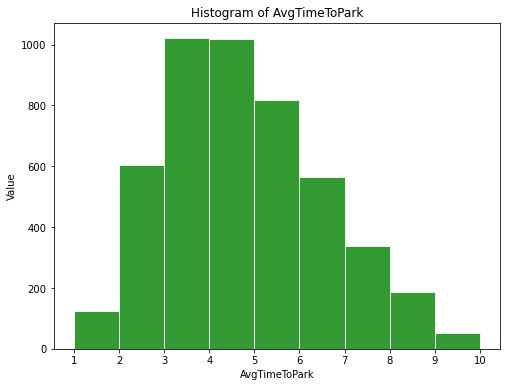

In [27]:
x = df.toPandas()['AvgTimeToPark'].values.tolist()
bins = np.arange(1, 11, 1)
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(x, bins, alpha=0.8, histtype='bar', color='green', ec='white')
plt.title('Histogram of AvgTimeToPark')
plt.xlabel('AvgTimeToPark')
plt.ylabel('Value')
plt.xticks(bins)
plt.show()

Text(0.5, 1.0, 'Violin-plot of AvgTimeToPark')

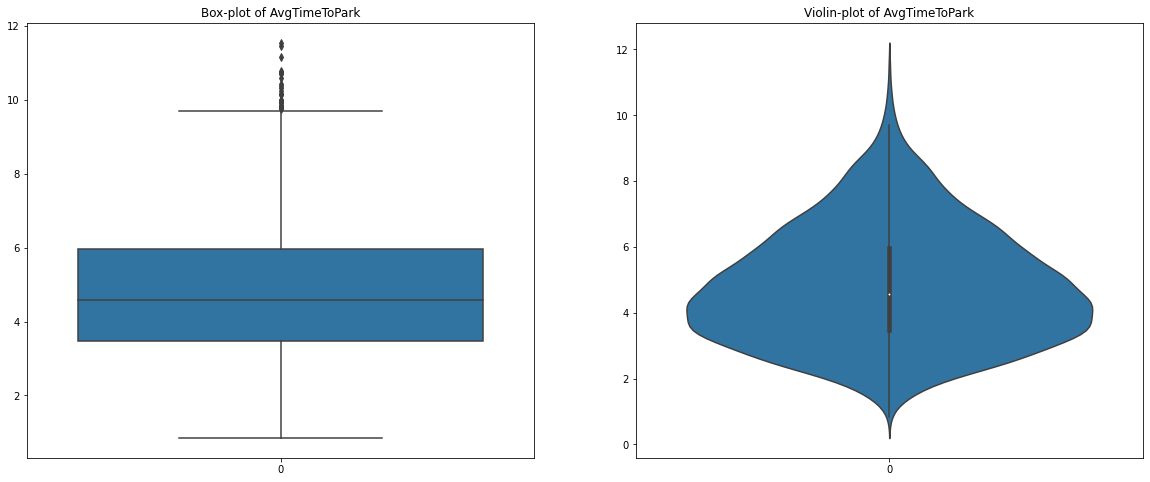

In [28]:
# Box plot
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.boxplot(data=x)
ax1.set_title('Box-plot of AvgTimeToPark')
ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.violinplot(data=x)
ax2.set_title('Violin-plot of AvgTimeToPark')

Text(0, 0.5, 'PercentSearching')

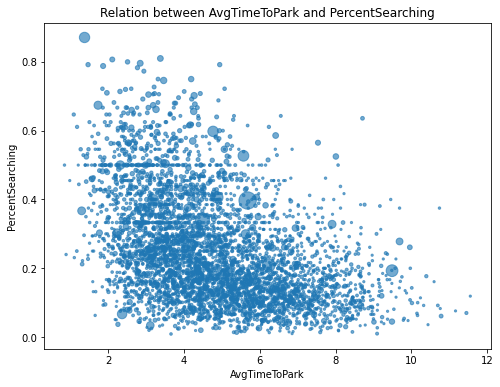

In [29]:
# Scatter plot of relation between AvgTimeToPark and PercentSearching
dfv = pd.read_csv('C:/Users/Jared/Dropbox/STUDY/Semester2/BDMDV/Coursework/SFPNA.csv')
dfs = dfv.sample(n = 1000)
fig, ax = plt.subplots(figsize=(8, 6))  
plt.scatter(data=dfv, x='AvgTimeToPark', y='PercentSearching',
            s ='TotalSearching', cmap='Set3', alpha=0.625)
plt.title('Relation between AvgTimeToPark and PercentSearching', size=12)
plt.xlabel('AvgTimeToPark', size=10)  
plt.ylabel('PercentSearching', size=10)

In [30]:
# Data preparation for visualisation by administration unit
df1 = (dfv.groupby(['Country']).agg({'Country': 'count'}))
df2 = (dfv.groupby(['State']).agg({'State': 'count'}))
df3 = (dfv.groupby(['City']).agg({'City': 'count'}))
df1 = df1.rename(columns={"Country": "Count"}) 
df1 = df1.reset_index()
a = df1.iloc[:,0]
b = df1.iloc[:,1]
df2 = df2.rename(columns={"State": "Count"})
df2 = df2.reset_index()
df3 = df3.rename(columns={"City": "Count"})
df3 = df3.reset_index()

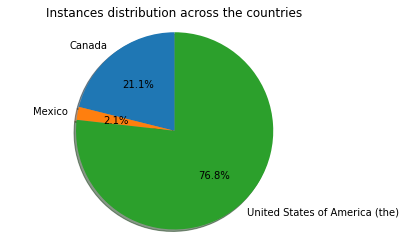

In [31]:
# Pie chart for countries
fig1, ax1 = plt.subplots()
ax1.pie(b, labels=a, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Instances distribution across the countries', size=12)
plt.show()

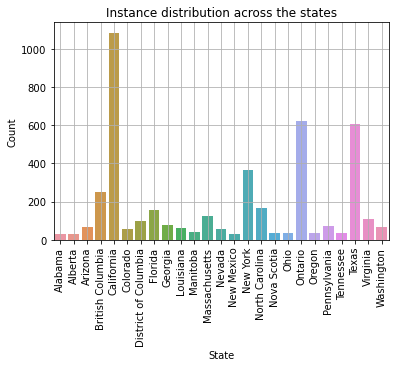

In [32]:
# Bar chart for all states with at least 25 instances
df22 = df2.loc[df2['Count'] >= 25]
ax = sns.barplot(x=df22.iloc[:,0], y=df22.iloc[:,1])
plt.title('Instance distribution across the states', size=12)
plt.xticks(rotation=90)
plt.grid()
plt.show()

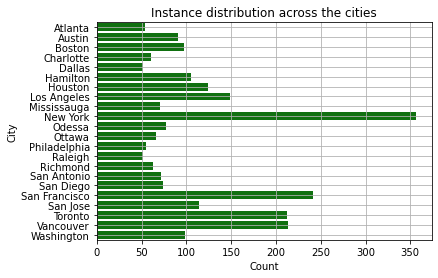

In [33]:
# Horizontal bar chart for all cities with at least 50 instances
df33 = df3.loc[df3['Count'] >= 50]
ax = sns.barplot(y=df33.iloc[:,0], x=df33.iloc[:,1],
                 orient = 'h', color='green')
plt.title('Instance distribution across the cities', size=12)
plt.grid()
plt.show()

In [34]:
# To double check choropleth map part
df4 = (dfv.groupby(['State']).agg({'State': 'count', 'AvgTimeToPark': 'mean', 'AvgUniqueGeohashes': 'mean'
                                  ,'TotalSearching': 'mean', 'PercentSearching': 'mean'}))

In [35]:
df4 = df4.rename(columns={"State": "Count"})
df4 = df4.reset_index()
df44 = df4.sort_values('TotalSearching', ascending=False)
df44

,State,Count,AvgTimeToPark,AvgUniqueGeohashes,TotalSearching,PercentSearching
18,Hidalgo,1,2.509000,4.483000,29.000000,0.206000
41,New Jersey,13,5.632462,5.033538,22.230769,0.167308
22,Jalisco,19,4.565211,4.997474,19.578947,0.346158
1,Alabama,31,4.017516,4.697742,15.774194,0.340548
31,Michoacán,2,6.336500,4.847000,15.000000,0.257000
...,...,...,...,...,...,...
36,México,1,4.528000,6.000000,6.000000,0.500000
65,Vermont,1,4.378000,5.167000,6.000000,0.222000
64,Veracruz,4,4.858250,4.750000,5.250000,0.372750
26,Maine,2,6.867000,6.200000,5.000000,0.201500


In [63]:
# Location analysis!

In [36]:
# Enrichmed of the dataset by boundaries of states across the North America
# In open-source software QGIS I merged 3 datasets of boundaries for US, Canada and Mexico
states = gpd.read_file('C:/Users/Jared/Dropbox/STUDY/Semester2/BDMDV/Coursework/SHP/states.shp')
states.head()

,State,Country,geometry
0,Newfoundland and Labrador,canada,"MULTIPOLYGON (((-57.40258 54.14964, -57.38431 ..."
1,Prince Edward Island,canada,"MULTIPOLYGON (((-61.98301 46.45775, -61.98137 ..."
2,Nova Scotia,canada,"MULTIPOLYGON (((-61.90234 45.87878, -61.90057 ..."
3,New Brunswick,canada,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ..."
4,Quebec,canada,"MULTIPOLYGON (((-58.64702 51.20815, -58.63989 ..."


In [37]:
# Merging my dataset from kaggle with states boundaries
gdf = pd.merge(states, df44, on=['State', 'State'], how='left').fillna(0)
gdf

,State,Country,geometry,Count,AvgTimeToPark,AvgUniqueGeohashes,TotalSearching,PercentSearching
0,Newfoundland and Labrador,canada,"MULTIPOLYGON (((-57.40258 54.14964, -57.38431 ...",0.0,0.000000,0.000000,0.000000,0.000000
1,Prince Edward Island,canada,"MULTIPOLYGON (((-61.98301 46.45775, -61.98137 ...",0.0,0.000000,0.000000,0.000000,0.000000
2,Nova Scotia,canada,"MULTIPOLYGON (((-61.90234 45.87878, -61.90057 ...",34.0,3.953235,5.087676,8.294118,0.267147
3,New Brunswick,canada,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ...",1.0,2.700000,5.000000,8.000000,0.222000
4,Quebec,canada,"MULTIPOLYGON (((-58.64702 51.20815, -58.63989 ...",16.0,5.164938,4.938375,9.937500,0.296187
...,...,...,...,...,...,...,...,...
93,Puerto Rico,usa,"MULTIPOLYGON (((-65.33750 18.34834, -65.33570 ...",18.0,5.301778,5.011389,14.222222,0.378722
94,Arkansas,usa,"POLYGON ((-94.61792 36.49941, -94.55929 36.499...",4.0,4.070000,5.494000,10.750000,0.318250
95,Tennessee,usa,"POLYGON ((-90.30988 35.00975, -90.30690 35.018...",35.0,4.452114,4.956143,7.571429,0.258629
96,Illinois,usa,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",24.0,6.114042,4.896917,6.541667,0.163458


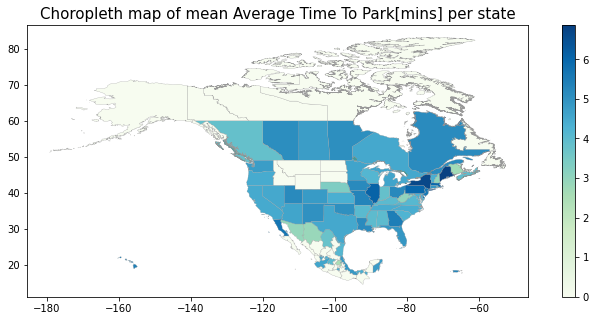

In [38]:
# Choropleth map of average time to park per state (above 100k people)
fig = gdf.plot(column='AvgTimeToPark', legend = True, figsize=(12, 5),
              cmap='GnBu', linewidth=0.25, edgecolor='0.6')
fig.set_title('Choropleth map of mean Average Time To Park[mins] per state',
                  y=1, fontdict={'fontsize': '15', 'fontweight': '3'})
plt.show()

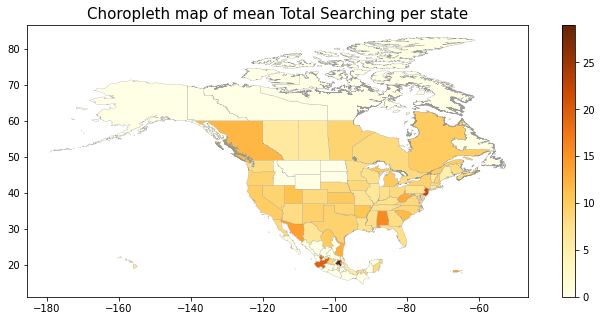

In [39]:
# Choropleth map of average total searching to park per state (above 100k people)
fig = gdf.plot(column='TotalSearching', legend = True, figsize=(12, 5),
              cmap='YlOrBr', linewidth=0.25, edgecolor='0.6')
fig.set_title('Choropleth map of mean Total Searching per state',
                  y=1, fontdict={'fontsize': '15', 'fontweight': '3'})
plt.show()

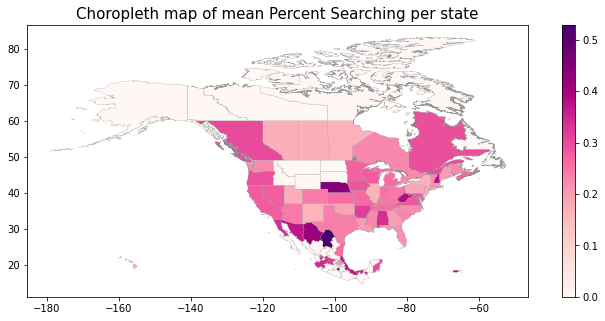

In [40]:
# Choropleth map of average percent searching per state (above 100k people)
fig = gdf.plot(column='PercentSearching', legend = True, figsize=(12, 5),
              cmap='RdPu', linewidth=0.25, edgecolor='0.6')
fig.set_title('Choropleth map of mean Percent Searching per state',
                  y=1, fontdict={'fontsize': '15', 'fontweight': '3'})
plt.show()

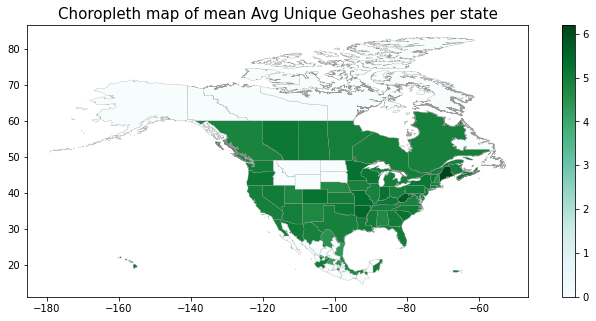

In [41]:
# Choropleth map of average unique geohashes per state (above 100k people)
fig = gdf.plot(column='AvgUniqueGeohashes', legend = True, figsize=(12, 5),
              cmap='BuGn', linewidth=0.25, edgecolor='0.6')
fig.set_title('Choropleth map of mean Avg Unique Geohashes per state',
                  y=1, fontdict={'fontsize': '15', 'fontweight': '3'})
plt.show()

In [42]:
df5 = dfv.loc[lambda dfv: dfv['City'] == 'New York']
df5

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,...,HourlyDistribution,SearchingByHour,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,UpdateDate,Version
0,dr5rsr8,"POLYGON((-73.992919921875 40.7345581054688, -7...",40.735,-73.993,40.736,-73.992,POINT(-73.99243 40.73529),40.735,-73.992,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.000,0.000,0.400,0.2,0.400,0.000,02/10/2020,2.2
1,dr5regk,"POLYGON((-74.0093994140625 40.7112121582031, -...",40.711,-74.009,40.713,-74.008,POINT(-74.00845 40.71184),40.712,-74.008,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.100,0.600,0.200,0.0,0.000,0.100,02/10/2020,2.2
2,dr5rkwk,"POLYGON((-73.9764404296875 40.6837463378906, -...",40.684,-73.976,40.685,-73.975,POINT(-73.97608 40.68458),40.685,-73.976,New York,...,"{""00"": null, ""01"": null, ""02"": 0, ""03"": 0, ""04...","{""00"": null, ""01"": null, ""02"": 0, ""03"": 0, ""04...",0.000,0.400,0.600,0.0,0.000,0.000,02/10/2020,2.2
4,dr5reuz,"POLYGON((-74.0052795410156 40.7194519042969, -...",40.719,-74.005,40.721,-74.004,POINT(-74.0047 40.71985),40.720,-74.005,New York,...,"{""00"": null, ""01"": null, ""02"": 0, ""03"": 0, ""04...","{""00"": null, ""01"": null, ""02"": 0, ""03"": 0, ""04...",0.200,0.400,0.400,0.0,0.000,0.000,02/10/2020,2.2
10,dr5ruk5,"POLYGON((-73.9888000488281 40.75927734375, -73...",40.759,-73.989,40.761,-73.987,POINT(-73.98818 40.75978),40.760,-73.988,New York,...,"{""00"": 0, ""01"": 0, ""02"": 0, ""03"": 0, ""04"": 0, ...","{""00"": 0, ""01"": 0, ""02"": 0, ""03"": 0, ""04"": 0, ...",0.000,0.167,0.500,0.0,0.167,0.167,02/10/2020,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,dr72mvh,"POLYGON((-73.9215087890625 40.8526611328125, -...",40.853,-73.922,40.854,-73.920,POINT(-73.92059 40.85362),40.854,-73.921,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.029,0.618,0.029,0.0,0.235,0.088,02/10/2020,2.2
3688,dr72wd2,"POLYGON((-73.89404296875 40.8815002441406, -73...",40.882,-73.894,40.883,-73.893,POINT(-73.89352 40.88276),40.883,-73.894,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.167,0.167,0.667,0.0,0.000,0.000,02/10/2020,2.2
3777,dr5qfhj,"POLYGON((-74.0849304199219 40.58349609375, -74...",40.584,-74.085,40.585,-74.084,POINT(-74.08426 40.58437),40.584,-74.084,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.667,0.333,0.000,0.0,0.000,0.000,02/10/2020,2.2
3963,dr5rykw,"POLYGON((-73.8967895507812 40.7620239257813, -...",40.762,-73.897,40.763,-73.895,POINT(-73.89583 40.76276),40.763,-73.896,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.167,0.333,0.500,0.0,0.000,0.000,02/10/2020,2.2


In [43]:
gdf2 = gpd.GeoDataFrame(df5, geometry=gpd.points_from_xy(x=df5.Longitude, y=df5.Latitude),
                        crs='EPSG:4326')
gdf2

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,...,SearchingByHour,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,UpdateDate,Version,geometry
0,dr5rsr8,"POLYGON((-73.992919921875 40.7345581054688, -7...",40.735,-73.993,40.736,-73.992,POINT(-73.99243 40.73529),40.735,-73.992,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.000,0.000,0.400,0.2,0.400,0.000,02/10/2020,2.2,POINT (-73.99200 40.73500)
1,dr5regk,"POLYGON((-74.0093994140625 40.7112121582031, -...",40.711,-74.009,40.713,-74.008,POINT(-74.00845 40.71184),40.712,-74.008,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.100,0.600,0.200,0.0,0.000,0.100,02/10/2020,2.2,POINT (-74.00800 40.71200)
2,dr5rkwk,"POLYGON((-73.9764404296875 40.6837463378906, -...",40.684,-73.976,40.685,-73.975,POINT(-73.97608 40.68458),40.685,-73.976,New York,...,"{""00"": null, ""01"": null, ""02"": 0, ""03"": 0, ""04...",0.000,0.400,0.600,0.0,0.000,0.000,02/10/2020,2.2,POINT (-73.97600 40.68500)
4,dr5reuz,"POLYGON((-74.0052795410156 40.7194519042969, -...",40.719,-74.005,40.721,-74.004,POINT(-74.0047 40.71985),40.720,-74.005,New York,...,"{""00"": null, ""01"": null, ""02"": 0, ""03"": 0, ""04...",0.200,0.400,0.400,0.0,0.000,0.000,02/10/2020,2.2,POINT (-74.00500 40.72000)
10,dr5ruk5,"POLYGON((-73.9888000488281 40.75927734375, -73...",40.759,-73.989,40.761,-73.987,POINT(-73.98818 40.75978),40.760,-73.988,New York,...,"{""00"": 0, ""01"": 0, ""02"": 0, ""03"": 0, ""04"": 0, ...",0.000,0.167,0.500,0.0,0.167,0.167,02/10/2020,2.2,POINT (-73.98800 40.76000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,dr72mvh,"POLYGON((-73.9215087890625 40.8526611328125, -...",40.853,-73.922,40.854,-73.920,POINT(-73.92059 40.85362),40.854,-73.921,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.029,0.618,0.029,0.0,0.235,0.088,02/10/2020,2.2,POINT (-73.92100 40.85400)
3688,dr72wd2,"POLYGON((-73.89404296875 40.8815002441406, -73...",40.882,-73.894,40.883,-73.893,POINT(-73.89352 40.88276),40.883,-73.894,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.167,0.167,0.667,0.0,0.000,0.000,02/10/2020,2.2,POINT (-73.89400 40.88300)
3777,dr5qfhj,"POLYGON((-74.0849304199219 40.58349609375, -74...",40.584,-74.085,40.585,-74.084,POINT(-74.08426 40.58437),40.584,-74.084,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.667,0.333,0.000,0.0,0.000,0.000,02/10/2020,2.2,POINT (-74.08400 40.58400)
3963,dr5rykw,"POLYGON((-73.8967895507812 40.7620239257813, -...",40.762,-73.897,40.763,-73.895,POINT(-73.89583 40.76276),40.763,-73.896,New York,...,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.167,0.333,0.500,0.0,0.000,0.000,02/10/2020,2.2,POINT (-73.89600 40.76300)


In [ ]:
#gdf5 = gpd.GeoDataFrame(df5, geometry='GeohashBounds', crs='EPSG:4326')
#gdf5

In [8]:
#dfnyc = gpd.read_file(gpd.datasets.get_path('nybb'))
#dfnyc2 = gpd.GeoDataFrame(dfnyc, crs=4326)
#dfnyc2
#dfnyc3 = gpd.GeoDataFrame(dfnyc2, geometry='geometry',
#                                  crs='EPSG:4326')
#dfnyc3

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


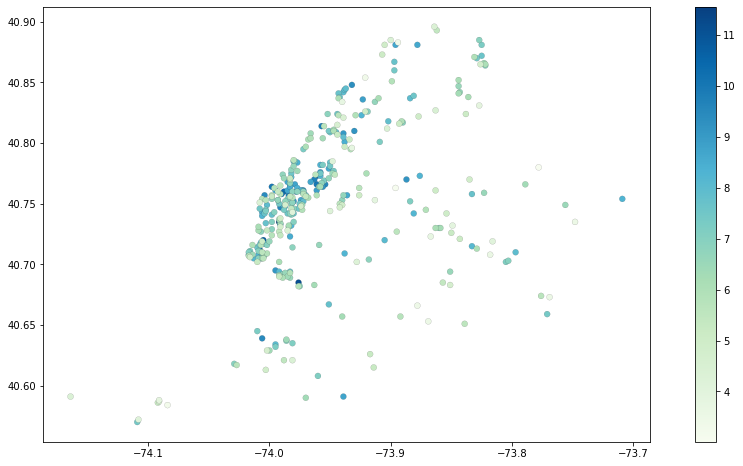

In [45]:
fig = gdf2.plot(column='AvgTimeToPark', legend = True, figsize=(16, 8),
              cmap='GnBu', linewidth=0.1, edgecolor='0.1')
#ctx.add_basemap(fig)

In [ ]:
# Hurray, it's end!